In [13]:
# setting the working directory
setwd("~/Documents/A-tracking-of-COVID-19/COVID-19/ready_to_use")

In [14]:
# Loading desired libraries
library(ggplot2)
library(stringr)

# loading plotting/machine learning
library(tidyverse)
library(caret)
library(mlbench)
library(kernlab)
library(rpart)

In [18]:
# includes data of all the countries
all = read.csv('COVID-19/Mixed/countryWise_bulk_summary.csv')

# includes data of four majour location
three = read.csv('COVID-19/THREE/Three_dataset_locationWise.csv')
#all
#three

In [19]:

# extracting the desired dataset
extractDatases <- function(region){
    if(region %in% c("Hubei", "World")) {
    temp = three[which(str_detect(three$Location, region)),]
    row.names(temp) <- NULL
} else {
    temp = all[which(str_detect(all$Country, region)),]
    row.names(temp) <- NULL
}

return(temp)
}


In [20]:
# country list
countries = matrix(levels(as.factor(all$Country)))
#head(countries, 10)

# Four majour locations
locations = matrix(levels(as.factor(three$Location)))
#locations

<br /> 
### Choosing desired Country/Region

In [21]:
# country i.e. to be used throughout the analysis
 rName = "World" # without hubei

# some other possible values of rName:
# 'World', 'Hubei', 'Diamond Cruise', 'Italy', 'Japan'.....etc

In [22]:
# filtering out desired country/location 
if(rName == "China"){
    region1 = extractDatases(rName)

    # joining Hubei for complete data of china
    region2 = extractDatases("Hubei")

    region = cbind(region1[,1:3], region1[,4:7]+region2[,4:7])
    colnames(region) <- colnames(region1)
} else {
    region = extractDatases(rName)
}

tail(region)

,Location,Day,Date,Confirmed,Deaths,Active.Cases,Closed.Cases
,<fct>,<int>,<fct>,<int>,<int>,<int>,<int>
121,World,121,21-05-2020,5057774,328998,4728776,328998
122,World,122,22-05-2020,5166873,334255,4832618,334255
123,World,123,23-05-2020,5267185,338196,4928989,338196
124,World,124,24-05-2020,5365075,341137,5023938,341137
125,World,125,25-05-2020,5453669,344241,5109428,344241
126,World,126,26-05-2020,5548562,348200,5200362,348200


In [23]:
region=region[,c(2, 4:7)]
head(region, 10)

,Day,Confirmed,Deaths,Active.Cases,Closed.Cases
,<int>,<int>,<int>,<int>,<int>
1,1,111,0,111,0
2,2,210,0,210,0
3,3,392,0,392,0
4,4,673,0,673,0
5,5,1060,0,1060,0
6,6,1504,0,1504,0
7,7,2024,0,2024,0
8,8,2612,0,2612,0
9,9,3331,0,3331,0


In [24]:
# calculate the percent (using Confirmed cases as total)
percent <- function(dfName){
    get(dfName) -> df
    part <- NULL
    
    for(i in 1:nrow(df)) {
        val = df[i,"Active.Cases"]
        Total = df[i,"Confirmed"]
        
        
        if(i == 1)
            if(val==0)
                part = 0
            else
                part = as.numeric((val*100)/Total)
        else
            if(val==0)
                part = c(part, 0)
            else
                part <- c(part, as.numeric((val*100)/Total))
    }
        
    return(part)
}

---

In [25]:
# CASES -> percentage
region$'percent_active' = percent("region")     # Active cases, out of every 100 Confirmed cases
region$'percent_closed' = 100-percent("region") # Closed cases, out of every 100 Confirmed cases

In [26]:
tail(region)

,Day,Confirmed,Deaths,Active.Cases,Closed.Cases,percent_active,percent_closed
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
121,121,5057774,328998,4728776,328998,93.49520,6.504798
122,122,5166873,334255,4832618,334255,93.53081,6.469193
123,123,5267185,338196,4928989,338196,93.57919,6.420811
124,124,5365075,341137,5023938,341137,93.64152,6.358476
125,125,5453669,344241,5109428,344241,93.68790,6.312099
126,126,5548562,348200,5200362,348200,93.72450,6.275500


<br />* Dataset is ready

---

<br />

### Understanding the plot

Warning message:
“Use of `region$Day` is discouraged. Use `Day` instead.”
Warning message:
“Use of `region$percent_active` is discouraged. Use `percent_active` instead.”


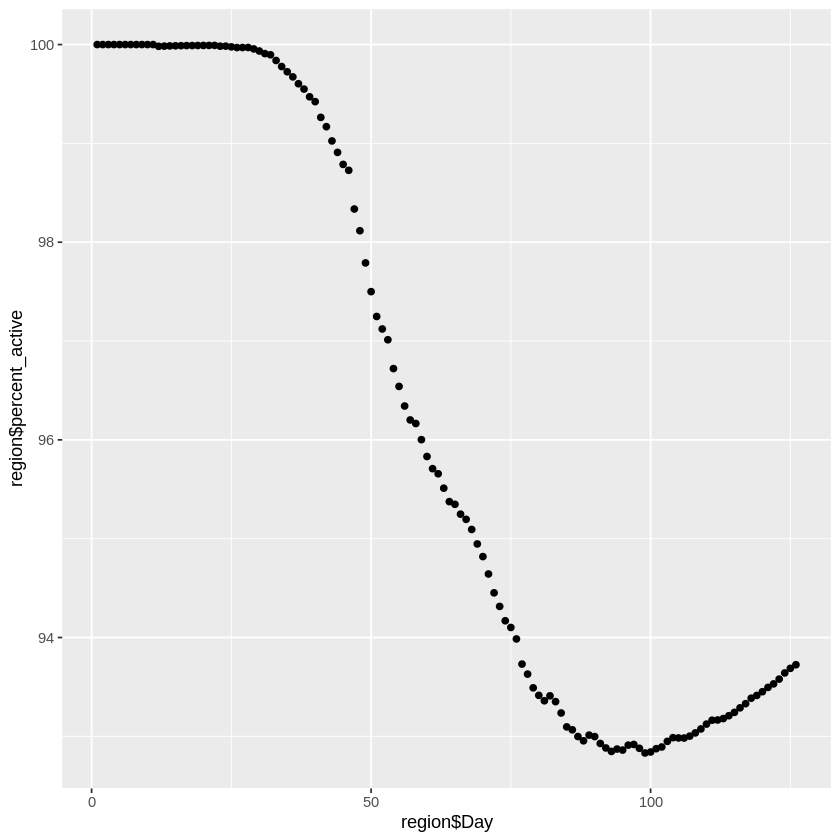

In [27]:
# Day vs %Closed Cases
region.scatter.plot <- ggplot(region, aes(x = region$Day, y = region$percent_active)) +
                        geom_point()
region.scatter.plot